In [4]:
import requests
from tqdm import tqdm
import pandas as pd
import numpy as np
import time
import my_utils as mu
import math
import random
import imp
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objs as go
import plotly.express as px
imp.reload(mu)
tqdm.pandas()

C:\Users\user\AppData\Local\Temp\ipykernel_9004\3501253536.py:9: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp


C:\Users\user\AppData\Local\Temp\ipykernel_7384\223431023.py:9: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp


In [2]:
# 폰트 조정
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/gulim.ttc"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font) # 윈도우

In [5]:
mu.db_open()
df = mu.oracle_execute('select * from lol_datas')
mu.oracle_close()

DatabaseError: ORA-12541: TNS:no listener

In [27]:
conn= mu.connect_mysql('icia')
df = pd.DataFrame(mu.mysql_execute_dict('select * from lol_datas',conn))
conn.close()

In [28]:
df

,gameId,gameDuration,gameVersion,summonerName,summonerLevel,participantId,championName,champExperience,teamPosition,teamId,...,g_16,g_17,g_18,g_19,g_20,g_21,g_22,g_23,g_24,g_25
0,KR_6309025486,2136,13.1.489.3737,어둠의사신야스오,272,1,TahmKench,17323,TOP,100,...,4410,4862,5081,5699,5864,5986,6268,6790,6946,7259
1,KR_6309025486,2136,13.1.489.3737,리차드 Lim,417,2,Amumu,23196,JUNGLE,100,...,7915,8434,9224,10923,11045,11287,11666,12523,12651,13129
2,KR_6309025486,2136,13.1.489.3737,변종홍어,43,3,Leblanc,18307,MIDDLE,100,...,5578,5721,6100,6942,7196,7619,7880,8571,8716,9052
3,KR_6309025486,2136,13.1.489.3737,파주 최강 원딜러,251,4,Samira,17513,BOTTOM,100,...,7017,7736,8409,8807,9103,9470,10172,10739,11133,11909
4,KR_6309025486,2136,13.1.489.3737,God of moving,87,5,Ashe,17417,UTILITY,100,...,5986,6365,6672,7612,7753,8084,8680,9695,9884,10405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105815,KR_6381378912,1601,13.4.494.1549,MEROONA,52,6,Jax,10553,TOP,200,...,4007,4171,5598,5805,6135,6375,6641,6806,7780,7938
105816,KR_6381378912,1601,13.4.494.1549,라인주때염,299,7,Kindred,10194,JUNGLE,200,...,4650,5621,5874,6627,7249,7509,7971,8242,8561,8683
105817,KR_6381378912,1601,13.4.494.1549,지수는 공주,191,8,Galio,11597,MIDDLE,200,...,5239,5689,6018,6243,6445,6747,6899,7154,7495,7681
105818,KR_6381378912,1601,13.4.494.1549,정 신 혼 미 함,389,9,Sivir,9860,BOTTOM,200,...,4765,5082,5484,5681,5869,6252,6618,6879,7104,7463


In [29]:
my_df = df[df.gameId =='KR_6258040492']

In [30]:
my_df

,gameId,gameDuration,gameVersion,summonerName,summonerLevel,participantId,championName,champExperience,teamPosition,teamId,...,g_16,g_17,g_18,g_19,g_20,g_21,g_22,g_23,g_24,g_25
76760,KR_6258040492,2440,12.23.483.5208,sherlocklovejohn,91,1,Malphite,15379,TOP,100,...,5516,5838,6154,6326,6518,6970,7218,7341,7463,7710
76761,KR_6258040492,2440,12.23.483.5208,염오쩌둥,195,2,Graves,18738,JUNGLE,100,...,5659,6526,7384,8037,8426,8775,9002,9187,9660,10493
76762,KR_6258040492,2440,12.23.483.5208,anather5337,219,3,Yasuo,14240,MIDDLE,100,...,6910,7466,7791,8359,8522,8787,8909,9081,9203,9963
76763,KR_6258040492,2440,12.23.483.5208,jungwon99,239,4,Draven,15717,BOTTOM,100,...,6558,7204,7586,7883,8212,8691,8814,9523,9751,10380
76764,KR_6258040492,2440,12.23.483.5208,롤린이떴다,181,5,Lux,13278,UTILITY,100,...,4458,5392,5875,6107,6328,6648,6837,7128,7310,7633
76765,KR_6258040492,2440,12.23.483.5208,Jeongsunha,40,6,Sett,18967,TOP,200,...,6208,6352,6583,6734,6891,7083,8265,8527,9012,9176
76766,KR_6258040492,2440,12.23.483.5208,구철통,258,7,Lillia,21639,JUNGLE,200,...,8627,8812,9087,9519,10097,10324,10640,11367,11738,11861
76767,KR_6258040492,2440,12.23.483.5208,탈론 명인,91,8,Akali,17250,MIDDLE,200,...,4502,4624,5546,5679,5864,5987,6345,7367,7490,7647
76768,KR_6258040492,2440,12.23.483.5208,149cm,155,9,Varus,18100,BOTTOM,200,...,4670,4925,5260,5529,5729,6018,6387,6969,7267,7644
76769,KR_6258040492,2440,12.23.483.5208,아이언 구렁텅이,295,10,Morgana,14908,UTILITY,200,...,3449,3649,3913,4185,4386,4554,4744,4935,5194,5376


In [31]:
my_df = my_df[['gameId','summonerName','championName','teamPosition','teamId','win','kills','deaths','assists','g_15','g_20']]

In [32]:
my_df

,gameId,summonerName,championName,teamPosition,teamId,win,kills,deaths,assists,g_15,g_20
76760,KR_6258040492,sherlocklovejohn,Malphite,TOP,100,True,6,11,18,5331,6518
76761,KR_6258040492,염오쩌둥,Graves,JUNGLE,100,True,8,8,11,5252,8426
76762,KR_6258040492,anather5337,Yasuo,MIDDLE,100,True,10,11,14,6526,8522
76763,KR_6258040492,jungwon99,Draven,BOTTOM,100,True,13,7,8,6309,8212
76764,KR_6258040492,롤린이떴다,Lux,UTILITY,100,True,5,8,20,4262,6328
76765,KR_6258040492,Jeongsunha,Sett,TOP,200,False,15,8,16,5943,6891
76766,KR_6258040492,구철통,Lillia,JUNGLE,200,False,8,4,27,8469,10097
76767,KR_6258040492,탈론 명인,Akali,MIDDLE,200,False,10,13,8,4295,5864
76768,KR_6258040492,149cm,Varus,BOTTOM,200,False,10,8,10,4436,5729
76769,KR_6258040492,아이언 구렁텅이,Morgana,UTILITY,200,False,2,9,14,3309,4386


In [20]:
blue_team = my_df[my_df.TEAMID ==100]
red_team = my_df[my_df.TEAMID ==200]

In [21]:
blue_team

,GAMEID,SUMMONERNAME,CHAMPIONNAME,TEAMPOSITION,TEAMID,WIN,KILLS,DEATHS,ASSISTS,G_14
2988,KR_6383066191,원탑모델도상,Teemo,TOP,100,False,0,1,0,2893
2989,KR_6383066191,닫힌 서랍,Nocturne,JUNGLE,100,False,4,2,1,5183
2990,KR_6383066191,새콤한딸기,Akali,MIDDLE,100,False,1,4,1,4044
2991,KR_6383066191,kokopamjjag,Sett,BOTTOM,100,False,0,4,1,3631
2992,KR_6383066191,보스티모,Senna,UTILITY,100,False,2,4,1,4351


In [26]:
red_team = red_team.drop(columns=['TEAMID','WIN']).rename(columns = {'SUMMONERNAME':'red_SUMMONERNAME','CHAMPIONNAME':'red_CHAMPIONNAME','KILLS':'red_KILLS','DEATHS':'red_DEATHS','ASSISTS':'red_ASSISTS','G_14':'red_G_14'})

In [25]:
blue_team.sort_values(by=['G_14'],ascending=False)

,GAMEID,SUMMONERNAME,CHAMPIONNAME,TEAMPOSITION,TEAMID,WIN,KILLS,DEATHS,ASSISTS,G_14
2989,KR_6383066191,닫힌 서랍,Nocturne,JUNGLE,100,False,4,2,1,5183
2992,KR_6383066191,보스티모,Senna,UTILITY,100,False,2,4,1,4351
2990,KR_6383066191,새콤한딸기,Akali,MIDDLE,100,False,1,4,1,4044
2991,KR_6383066191,kokopamjjag,Sett,BOTTOM,100,False,0,4,1,3631
2988,KR_6383066191,원탑모델도상,Teemo,TOP,100,False,0,1,0,2893


In [28]:
red_team.sort_values(by=['red_G_14'],ascending=False)

,GAMEID,red_SUMMONERNAME,red_CHAMPIONNAME,TEAMPOSITION,red_KILLS,red_DEATHS,red_ASSISTS,red_G_14
2996,KR_6383066191,부천난봉꾼,MissFortune,BOTTOM,3,2,1,5865
2995,KR_6383066191,크린넥스,Annie,MIDDLE,5,3,0,5230
2994,KR_6383066191,민지의 서폿생활,Elise,JUNGLE,5,0,2,5099
2993,KR_6383066191,T1 jeus2,Kayle,TOP,1,1,3,5060
2997,KR_6383066191,질병게임체험,Swain,UTILITY,1,1,3,4780


In [30]:
game_stat_df = pd.merge(blue_team,red_team,on=['GAMEID','TEAMPOSITION'])

In [71]:
game_stat_df2.astype(dtype='int64',errors = 'ignore')

,GAMEID,SUMMONERNAME,CHAMPIONNAME,TEAMPOSITION,TEAMID,WIN,KILLS,DEATHS,ASSISTS,G_14,red_SUMMONERNAME,red_CHAMPIONNAME,red_KILLS,red_DEATHS,red_ASSISTS,red_G_14,lane_win
0,KR_6383066191,원탑모델도상,Teemo,TOP,100,False,0,1,0,2893,T1 jeus2,Kayle,1,1,3,5060,red_win
1,KR_6383066191,닫힌 서랍,Nocturne,JUNGLE,100,False,4,2,1,5183,민지의 서폿생활,Elise,5,0,2,5099,blue_win
2,KR_6383066191,새콤한딸기,Akali,MIDDLE,100,False,1,4,1,4044,크린넥스,Annie,5,3,0,5230,red_win
3,KR_6383066191,kokopamjjag,Sett,BOTTOM,100,False,0,4,1,3631,부천난봉꾼,MissFortune,3,2,1,5865,red_win
4,KR_6383066191,보스티모,Senna,UTILITY,100,False,2,4,1,4351,질병게임체험,Swain,1,1,3,4780,red_win


In [53]:
def win(x):
    if x.G_14 < x.red_G_14:
        return 'red_win'
    if x.G_14 > x.red_G_14:
        return 'blue_win'
    else: return 'draw'

In [54]:
game_stat_df['lane_win']=game_stat_df.apply(lambda x: win(x),axis=1)

In [115]:
my_df2 = df[['gameId','championName','teamId','teamPosition','win','g_14']]

In [116]:
my_df2['win']=my_df2['win'].apply(lambda x:1 if x=='True' else 0)

C:\Users\user\AppData\Local\Temp\ipykernel_6292\3792738749.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df2['win']=my_df2['win'].apply(lambda x:1 if x=='True' else 0)


In [117]:
my_df2

,gameId,championName,teamId,teamPosition,win,g_14
0,KR_6306333604,Garen,100,TOP,0,0
1,KR_6306333604,Kindred,100,JUNGLE,0,0
2,KR_6306333604,Ekko,100,MIDDLE,0,0
3,KR_6306333604,Kaisa,100,BOTTOM,0,0
4,KR_6306333604,Blitzcrank,100,UTILITY,0,0
...,...,...,...,...,...,...
79175,KR_6258040492,Sett,200,TOP,0,4707
79176,KR_6258040492,Lillia,200,JUNGLE,0,7783
79177,KR_6258040492,Akali,200,MIDDLE,0,3967
79178,KR_6258040492,Varus,200,BOTTOM,0,4260


In [118]:
cnt_df = my_df2.groupby(['championName','teamPosition'])[['win']].count().rename(columns={'win':'cnt'})

In [119]:
cnt_df

cnt
championName teamPosition     
Aatrox       BOTTOM          2
             JUNGLE          4
             MIDDLE         52
             TOP           639
             UTILITY         5
...                        ...
Zyra         BOTTOM          3
             JUNGLE          1
             MIDDLE          8
             TOP             3
             UTILITY       212

[729 rows x 1 columns]

In [83]:
win_df = my_df2.groupby(['CHAMPIONNAME','TEAMPOSITION'])[['WIN']].sum()

In [84]:
win_df

WIN
CHAMPIONNAME TEAMPOSITION     
Aatrox       TOP             3
Ahri         MIDDLE         10
             UTILITY         1
Akali        MIDDLE          6
             TOP             6
...                        ...
Zilean       MIDDLE          1
             UTILITY         3
Zoe          MIDDLE          5
             UTILITY         1
Zyra         UTILITY         7

[335 rows x 1 columns]

In [85]:
cnt_win_df = pd.merge(cnt_df,win_df,on=['CHAMPIONNAME','TEAMPOSITION'])

In [86]:
cnt_win_df

CNT  WIN
CHAMPIONNAME TEAMPOSITION          
Aatrox       TOP            12    3
Ahri         MIDDLE         14   10
             UTILITY         1    1
Akali        MIDDLE         21    6
             TOP            13    6
...                        ...  ...
Zilean       MIDDLE          1    1
             UTILITY         5    3
Zoe          MIDDLE          8    5
             UTILITY         2    1
Zyra         UTILITY        12    7

[335 rows x 2 columns]

In [87]:
cnt_win_df['win_rate']=round(cnt_win_df.WIN / cnt_win_df.CNT,4)

In [88]:
cnt_win_df

CNT  WIN  win_rate
CHAMPIONNAME TEAMPOSITION                    
Aatrox       TOP            12    3    0.2500
Ahri         MIDDLE         14   10    0.7143
             UTILITY         1    1    1.0000
Akali        MIDDLE         21    6    0.2857
             TOP            13    6    0.4615
...                        ...  ...       ...
Zilean       MIDDLE          1    1    1.0000
             UTILITY         5    3    0.6000
Zoe          MIDDLE          8    5    0.6250
             UTILITY         2    1    0.5000
Zyra         UTILITY        12    7    0.5833

[335 rows x 3 columns]

In [90]:
cnt_win_df.sort_values(by=['win_rate'],ascending=False)[:60]

CNT  WIN  win_rate
CHAMPIONNAME TEAMPOSITION                    
Neeko        TOP             1    1    1.0000
Shen         UTILITY         1    1    1.0000
Renata       UTILITY         3    3    1.0000
Sejuani      TOP             1    1    1.0000
             UTILITY         1    1    1.0000
Senna        BOTTOM          1    1    1.0000
Seraphine    BOTTOM          1    1    1.0000
Kled         MIDDLE          1    1    1.0000
Shen         JUNGLE          1    1    1.0000
Shyvana      MIDDLE          1    1    1.0000
Graves       UTILITY         1    1    1.0000
Singed       TOP             4    4    1.0000
Evelynn      TOP             1    1    1.0000
Sion         BOTTOM          1    1    1.0000
Draven       TOP             1    1    1.0000
Swain        BOTTOM          1    1    1.0000
             TOP             1    1    1.0000
Sylas        UTILITY         1    1    1.0000
Rammus       TOP             1    1    1.0000
Gwen         JUNGLE          1    1    1.0000
Teemo        JUNGLE          2    2    1.0000
Malzahar     UTILITY         1    1    1.0000
LeeSin       UTILITY         2    2    1.0000
Lucian       MIDDLE          1    1    1.0000
Kayle        MIDDLE          1    1    1.0000
Lulu         MIDDLE          1    1    1.0000
Malphite     UTILITY         1    1    1.0000
Karthus      JUNGLE          1    1    1.0000
Kalista      UTILITY         2    2    1.0000
Jhin         MIDDLE          1    1    1.0000
Poppy        TOP             3    3    1.0000
Neeko        UTILITY         1    1    1.0000
Nocturne     TOP             2    2    1.0000
Jax          MIDDLE          1    1    1.0000
             JUNGLE          1    1    1.0000
JarvanIV     UTILITY         1    1    1.0000
Olaf         JUNGLE          2    2    1.0000
Orianna      BOTTOM          1    1    1.0000
Taliyah      UTILITY         1    1    1.0000
Sett         UTILITY         1    1    1.0000
Xerath       BOTTOM          1    1    1.0000
Zilean       MIDDLE          1    1    1.0000
Velkoz       MIDDLE          1    1    1.0000
Zac          UTILITY         1    1    1.0000
Ziggs        BOTTOM          1    1    1.0000
AurelionSol  BOTTOM          1    1    1.0000
Viktor       TOP             1    1    1.0000
Volibear     JUNGLE          1    1    1.0000
Twitch       JUNGLE          1    1    1.0000
Tryndamere   MIDDLE          1    1    1.0000
Trundle      UTILITY         1    1    1.0000
             JUNGLE          2    2    1.0000
Twitch       BOTTOM          1    1    1.0000
Viego        MIDDLE          1    1    1.0000
Caitlyn      TOP             1    1    1.0000
Ahri         UTILITY         1    1    1.0000
Camille      MIDDLE          1    1    1.0000
Heimerdinger UTILITY         6    5    0.8333
Illaoi       TOP            14   11    0.7857
Maokai       TOP             4    3    0.7500

In [93]:
cnt_win_df.sort_values(by=['CNT'],ascending=False)[:60]

,,CNT,WIN,win_rate
CHAMPIONNAME,TEAMPOSITION,,,
LeeSin,JUNGLE,81,49,0.6049
Ezreal,BOTTOM,74,34,0.4595
Kaisa,BOTTOM,71,41,0.5775
Jinx,BOTTOM,66,26,0.3939
Thresh,UTILITY,57,24,0.4211
Caitlyn,BOTTOM,52,22,0.4231
Xayah,BOTTOM,49,26,0.5306
Jhin,BOTTOM,48,27,0.5625
JarvanIV,JUNGLE,45,29,0.6444


# G_14의 포지션별 챔피언의 골드량 데이터 만들기

In [97]:
mean_df = my_df2.groupby(['CHAMPIONNAME','TEAMPOSITION'])[['G_14']].mean().round(2).rename(columns={'WIN':'CNT'})

In [100]:
mean_df.sort_values(by=['G_14'], ascending=False)[:60]

,,G_14
CHAMPIONNAME,TEAMPOSITION,
Draven,TOP,10711.00
Neeko,TOP,7671.00
Swain,MIDDLE,7182.00
Caitlyn,TOP,6778.00
Gwen,JUNGLE,6743.00
Sejuani,MIDDLE,6599.00
Sion,BOTTOM,6570.00
Karthus,JUNGLE,6540.00
Belveth,JUNGLE,6434.50


In [102]:
mean_winrate_df=pd.merge(mean_df,cnt_win_df,on=['CHAMPIONNAME','TEAMPOSITION'])

In [104]:
mean_winrate_df.sort_values(by=['G_14'], ascending=False)[:60]

,,G_14,CNT,WIN,win_rate
CHAMPIONNAME,TEAMPOSITION,,,,
Draven,TOP,10711.00,1,1,1.0000
Neeko,TOP,7671.00,1,1,1.0000
Swain,MIDDLE,7182.00,1,0,0.0000
Caitlyn,TOP,6778.00,1,1,1.0000
Gwen,JUNGLE,6743.00,1,1,1.0000
Sejuani,MIDDLE,6599.00,1,0,0.0000
Sion,BOTTOM,6570.00,1,1,1.0000
Karthus,JUNGLE,6540.00,1,1,1.0000
Belveth,JUNGLE,6434.50,2,1,0.5000


# import matplotlib.pyplot as plt

In [123]:
my_df =df[df.gameId =='KR_6258040492']

In [125]:
my_df.columns

Index(['gameId', 'gameDuration', 'gameVersion', 'summonerName',
       'summonerLevel', 'participantId', 'championName', 'champExperience',
       'teamPosition', 'teamId', 'win', 'kills', 'deaths', 'assists',
       'totalDamageDealtToChampions', 'totalDamageTaken', 'g_5', 'g_6', 'g_7',
       'g_8', 'g_9', 'g_10', 'g_11', 'g_12', 'g_13', 'g_14', 'g_15', 'g_16',
       'g_17', 'g_18', 'g_19', 'g_20', 'g_21', 'g_22', 'g_23', 'g_24', 'g_25'],
      dtype='object')

In [126]:
my_df.set_index('summonerName', inplace=True)

In [127]:
damage =my_df['totalDamageDealtToChampions']

In [128]:
damage

summonerName
sherlocklovejohn    31064
염오쩌둥                33171
anather5337         40046
jungwon99           33466
롤린이떴다               42697
Jeongsunha          37051
구철통                 40872
탈론 명인               19155
149cm               28281
아이언 구렁텅이            11628
Name: totalDamageDealtToChampions, dtype: int64

In [130]:
# 폰트 조정
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/gulim.ttc"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font) # 윈도우

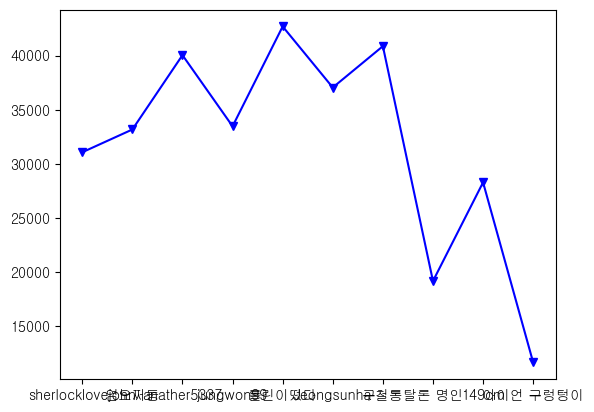

In [131]:
plt.plot(damage,color = 'blue',marker='v')

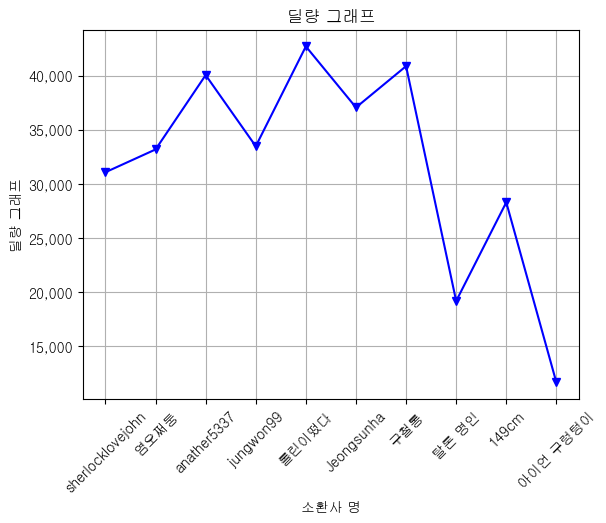

In [146]:
yticks_interval = 5000

maxlim = int((damage.max()/yticks_interval+1))* yticks_interval
values = np.arange(0,maxlim+1, yticks_interval)
plt.yticks(values,['%s'%format(val,',')for val in values])# 리스트 컴프리헨션

plt.grid(True)
plt.title('딜량 그래프')
plt.xlabel('소환사 명')
plt.ylabel('딜량 그래프')

plt.xticks(rotation=45)
plt.plot(damage,color = 'blue' , marker='v')

In [164]:
tmp_df = df[['teamPosition','totalDamageDealtToChampions','totalDamageTaken','g_15']]

In [165]:
tmp_df = tmp_df[~tmp_df.teamPosition.isna()]

In [155]:
my_tmp = tmp_df[tmp_df.teamPosition=='JUNGLE']

In [156]:
xdata=my_tmp.g_15
ydata=my_tmp.totalDamageDealtToChampions

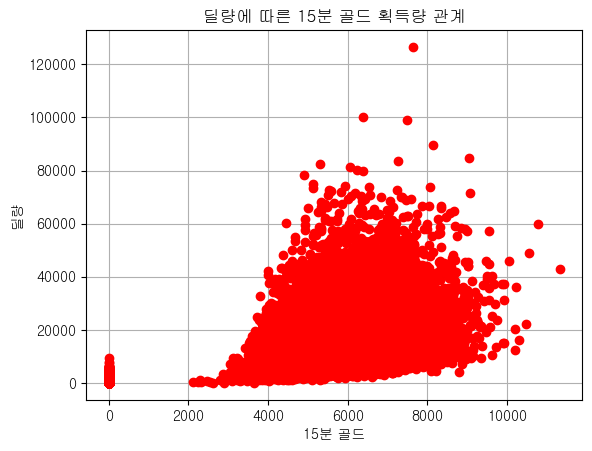

In [158]:
plt.figure()
plt.plot(xdata,ydata,color='r',marker='o', linestyle='None')
plt.xlabel('15분 골드')
plt.ylabel('딜량')
plt.title('딜량에 따른 15분 골드 획득량 관계')
plt.grid(True)
           

In [159]:
ydata2 = my_tmp.totalDamageTaken

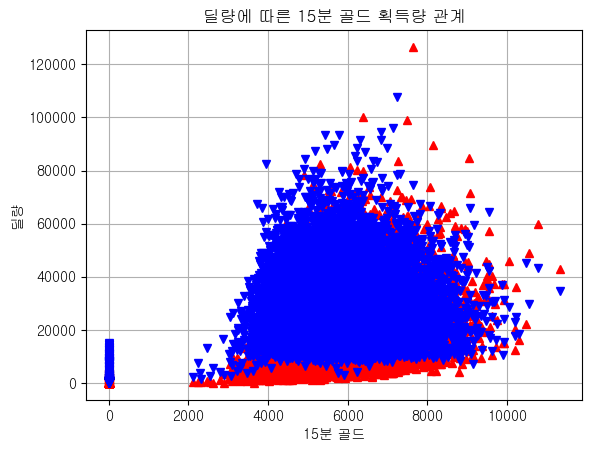

In [161]:
plt.figure()
plt.plot(xdata,ydata,color='r',marker='^', linestyle='None')
plt.plot(xdata,ydata2, color='b',marker='v',linestyle='None')
plt.xlabel('15분 골드')
plt.ylabel('딜량')
plt.title('딜량에 따른 15분 골드 획득량 관계')
plt.grid(True)
           

In [173]:
group_df = tmp_df.groupby('teamPosition').mean().round().reset_index()

In [174]:
group_df

,teamPosition,totalDamageDealtToChampions,totalDamageTaken,g_15
0,,1811.0,2435.0,907.0
1,BOTTOM,19976.0,18767.0,5604.0
2,JUNGLE,17315.0,29334.0,5566.0
3,MIDDLE,19896.0,22172.0,5275.0
4,TOP,19373.0,26709.0,5216.0
5,UTILITY,11367.0,17112.0,4073.0


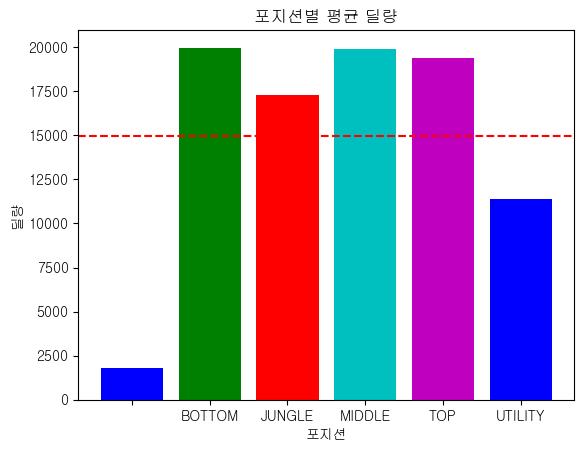

In [176]:
plt.figure()
plt.bar(group_df.teamPosition, group_df.totalDamageDealtToChampions, color = ['b','g','r','c','m'])
plt.xlabel('포지션')
plt.ylabel('딜량')
plt.title('포지션별 평균 딜량')
mean_val = group_df.totalDamageDealtToChampions.mean()
plt.axhline(y=mean_val, color = 'r', linestyle = 'dashed')

In [179]:
group_df.set_index('teamPosition', inplace=True)

In [180]:
group_df

,totalDamageDealtToChampions,totalDamageTaken,g_15
teamPosition,,,
,1811.0,2435.0,907.0
BOTTOM,19976.0,18767.0,5604.0
JUNGLE,17315.0,29334.0,5566.0
MIDDLE,19896.0,22172.0,5275.0
TOP,19373.0,26709.0,5216.0
UTILITY,11367.0,17112.0,4073.0


Text(0.5, 1.0, '파이차트')

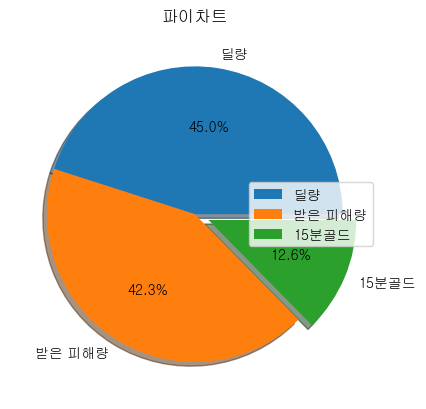

In [198]:
plt.figure()
plt.pie(group_df.loc['BOTTOM'], labels = ['딜량','받은 피해량','15분골드'], shadow =True, autopct='%1.1f%%', explode = (0,0,0.1))
plt.grid(True)
plt.legend(loc = 7)
plt.title('파이차트')

In [5]:
tmp_df = df[['teamPosition','totalDamageDealtToChampions']]

In [7]:
tmp_df.set_index('teamPosition',inplace=True)

In [8]:
tmp_df

,totalDamageDealtToChampions
teamPosition,
TOP,18359
JUNGLE,43684
MIDDLE,14668
BOTTOM,37480
UTILITY,35474
...,...
TOP,25658
JUNGLE,30486
MIDDLE,34883


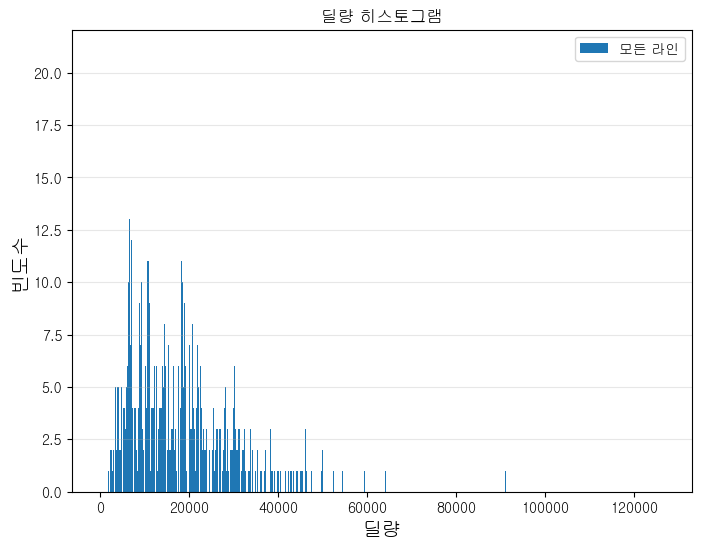

In [10]:
plt.figure(figsize = (8,6))
plt.hist(tmp_df, bins = len(tmp_df),label = '모든 라인',rwidth= 0.9)
plt.xlabel('딜량', size=14)
plt.ylabel('빈도수',size=14)
plt.title('딜량 히스토그램')
plt.legend(loc = 'upper right')
plt.grid(axis = 'y',alpha=0.3)

# conda install seaborn
# 에러 뜨면 넘파이 삭제
# conda uninstall numpy

In [12]:
import seaborn as sns

In [14]:
url = 'http://openapi.seoul.go.kr:8088/(인증키)/xml/GetParkInfo/1/5/'

In [45]:
df = mu.df_creater(url)

In [46]:
df

,PARKING_NAME,ADDR,PARKING_CODE,PARKING_TYPE,PARKING_TYPE_NM,OPERATION_RULE,OPERATION_RULE_NM,TEL,CAPACITY,PAY_YN,...,TIME_RATE,ADD_RATES,ADD_TIME_RATE,BUS_RATES,BUS_TIME_RATE,BUS_ADD_TIME_RATE,BUS_ADD_RATES,DAY_MAXIMUM,LAT,LNG
0,가마산고가밑 공영주차장(시),구로구 구로동 414-13,1234305,NS,노상 주차장,1,시간제 주차장,,1.0,Y,...,5.0,120.0,5.0,0.0,0.0,0.0,0.0,0.0,37.492937,126.882609
1,가마산고가밑 공영주차장(시),구로구 구로동 414-13,1234305,NS,노상 주차장,1,시간제 주차장,,1.0,Y,...,5.0,120.0,5.0,0.0,0.0,0.0,0.0,0.0,37.492889,126.882771
2,가마산고가밑 공영주차장(시),구로구 구로동 414-13,1234305,NS,노상 주차장,1,시간제 주차장,,1.0,Y,...,5.0,120.0,5.0,0.0,0.0,0.0,0.0,0.0,37.492947,126.882639
3,가마산고가밑 공영주차장(시),구로구 구로동 414-13,1234305,NS,노상 주차장,1,시간제 주차장,,1.0,Y,...,5.0,120.0,5.0,0.0,0.0,0.0,0.0,0.0,37.492858,126.882667
4,가마산고가밑 공영주차장(시),구로구 구로동 414-13,1234305,NS,노상 주차장,1,시간제 주차장,,1.0,Y,...,5.0,120.0,5.0,0.0,0.0,0.0,0.0,0.0,37.492851,126.882464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,거주자우선주차장(구),강동구 성내동 540-0,1567464,NS,노상 주차장,3,시간제 + 거주자 주차장,,1.0,Y,...,5.0,250.0,5.0,0.0,0.0,0.0,0.0,0.0,37.530119,127.124641
996,거주자우선주차장(구),강동구 성내동 540-0,1567464,NS,노상 주차장,3,시간제 + 거주자 주차장,,1.0,Y,...,5.0,250.0,5.0,0.0,0.0,0.0,0.0,0.0,37.530508,127.123798
997,거주자우선주차장(구),강동구 성내동 540-0,1567464,NS,노상 주차장,3,시간제 + 거주자 주차장,,1.0,Y,...,5.0,250.0,5.0,0.0,0.0,0.0,0.0,0.0,37.530022,127.124844
998,거주자우선주차장(구),강동구 성내동 540-0,1567464,NS,노상 주차장,3,시간제 + 거주자 주차장,,1.0,Y,...,5.0,250.0,5.0,0.0,0.0,0.0,0.0,0.0,37.530262,127.124339


In [47]:
my_df = df[['PARKING_NAME','CAPACITY','PAY_NM','SATURDAY_PAY_NM','HOLIDAY_PAY_NM','FULLTIME_MONTHLY','RATES','ADD_RATES']]

In [48]:
my_df.columns = ['주차장명','주차수','유무료','주말유무료','공휴일유무료','월정기권금액','기본요금','추가요금']

In [49]:
my_df =my_df.drop_duplicates()

In [50]:
my_df

,주차장명,주차수,유무료,주말유무료,공휴일유무료,월정기권금액,기본요금,추가요금
0,가마산고가밑 공영주차장(시),1.0,유료,무료,유료,0,120.0,120.0
18,개봉1동마을공동주차장(구),56.0,유료,유료,유료,50000,50.0,50.0
19,개봉1동 노외주차장(구),134.0,유료,무료,무료,75000,100.0,100.0
20,개화역 공영주차장(시),483.0,유료,무료,무료,91000,170.0,170.0
21,가산동 금천교 공영주차장(시),1.0,유료,무료,유료,0,200.0,200.0
60,강일동공영주차장(구),85.0,유료,무료,무료,80000,150.0,150.0
61,가로공원로 지하 주차장(구),500.0,유료,유료,유료,60000,100.0,100.0
62,견인보관소(구),40.0,유료,무료,무료,170000,500.0,500.0
63,DDP북측 마장로 관광버스전용 주차장(시),1.0,무료,유료,유료,0,0.0,0.0
67,고척근린공원지하주차장(구),199.0,유료,무료,무료,112000,150.0,150.0


<AxesSubplot:title={'center':'주차장유무료'}, xlabel='유무료', ylabel='count'>

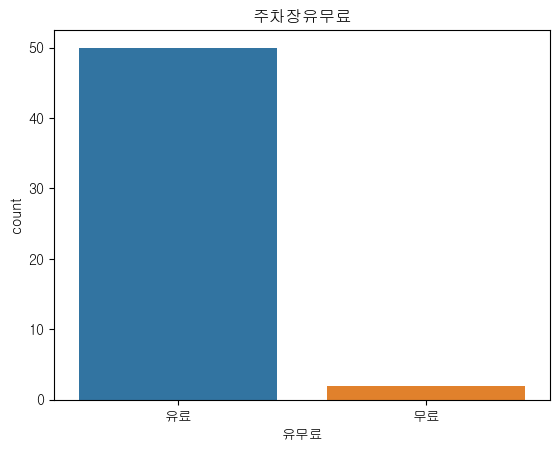

In [51]:
plt.figure()
plt.title('주차장유무료')
sns.countplot(x='유무료',data=my_df,order=['유료','무료'])

<AxesSubplot:title={'center':'기본요금 히스토그램'}, xlabel='기본요금', ylabel='Count'>

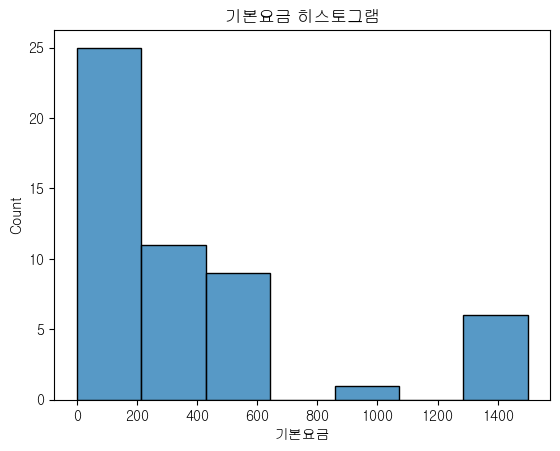

In [52]:
plt.figure()
plt.title('기본요금 히스토그램')
sns.histplot(x=my_df['기본요금'])

<AxesSubplot:xlabel='기본요금', ylabel='추가요금'>

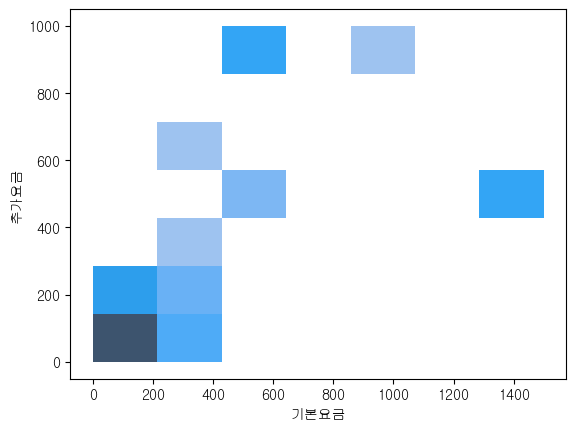

In [53]:
sns.histplot(x=my_df['기본요금'],y=my_df['추가요금'])

<AxesSubplot:xlabel='기본요금', ylabel='Density'>

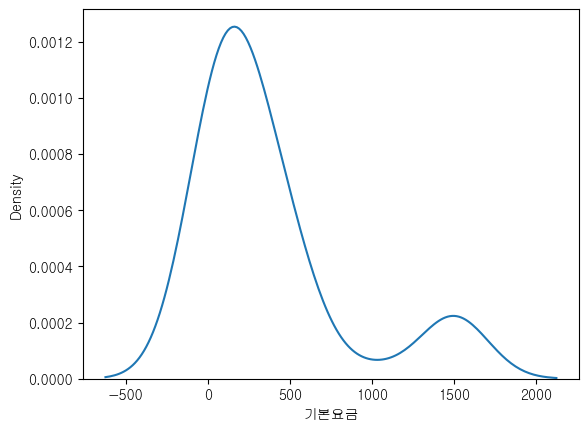

In [54]:
sns.kdeplot(x=my_df['기본요금'])

# 골드 20분 데이터를 통해서 골드 15,20분 kdeplot 그려보기

<AxesSubplot:xlabel='g_15', ylabel='Density'>

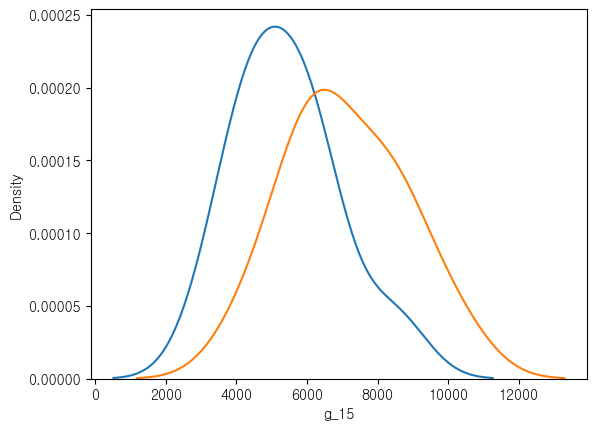

In [44]:
plt.figure()
sns.kdeplot(x=my_df['g_15'])
sns.kdeplot(x=my_df['g_20'])

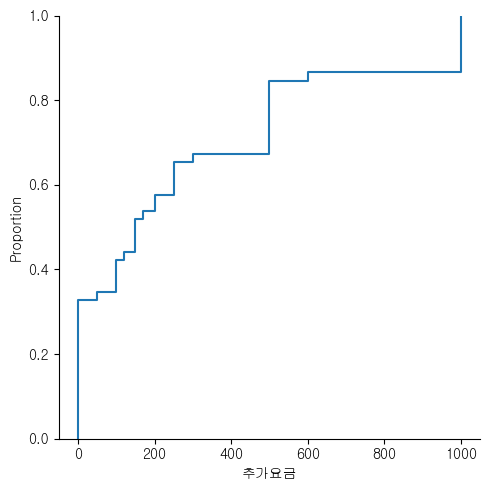

In [57]:
sns.displot(x=my_df['추가요금'],kind = 'ecdf')

<AxesSubplot:xlabel='기본요금', ylabel='Density'>

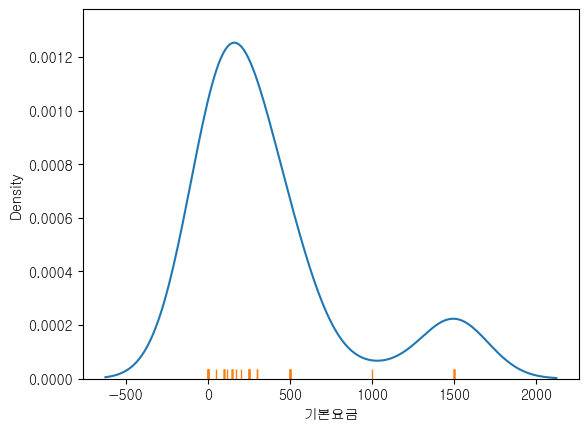

In [59]:
sns.kdeplot(x=my_df['기본요금'])
sns.rugplot(x=my_df['기본요금'])

<AxesSubplot:xlabel='주말유무료', ylabel='기본요금'>

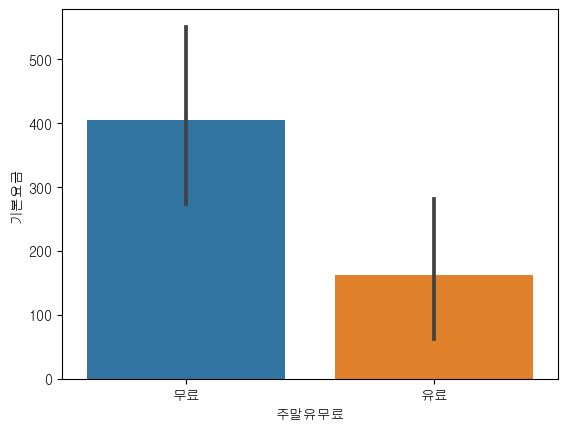

In [60]:
sns.barplot(x=my_df['주말유무료'],y=my_df['기본요금'])

<AxesSubplot:xlabel='주말유무료', ylabel='기본요금'>

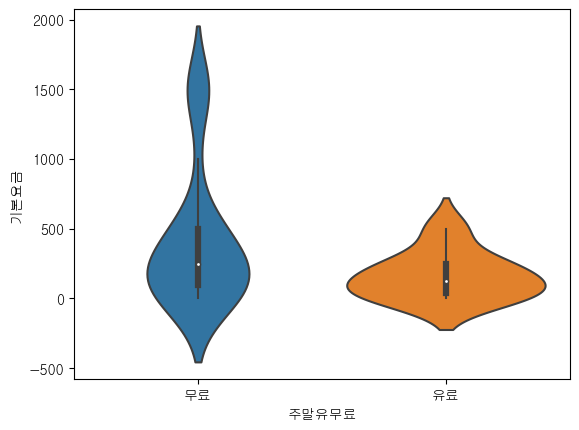

In [62]:
sns.violinplot(x=my_df['주말유무료'],y=my_df['기본요금'])

<AxesSubplot:xlabel='주말유무료', ylabel='기본요금'>

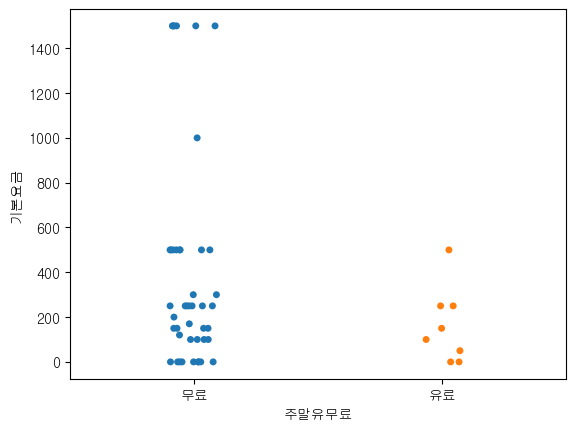

In [63]:
sns.stripplot(x=my_df['주말유무료'],y=my_df['기본요금'])

In [64]:
my_df.corr()

,주차수,기본요금,추가요금
주차수,1.000000,-0.182338,-0.159718
기본요금,-0.182338,1.000000,0.562954
추가요금,-0.159718,0.562954,1.000000


<AxesSubplot:>

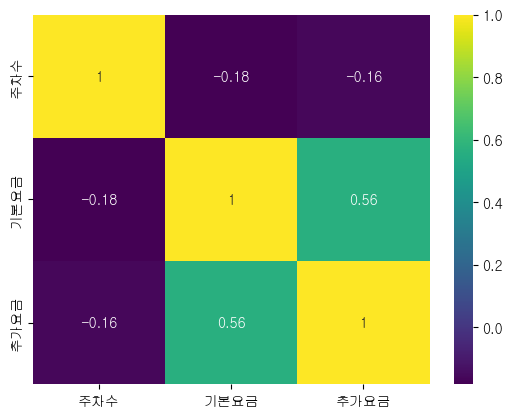

In [65]:
sns.heatmap(my_df.corr(), annot=True, cmap='viridis')

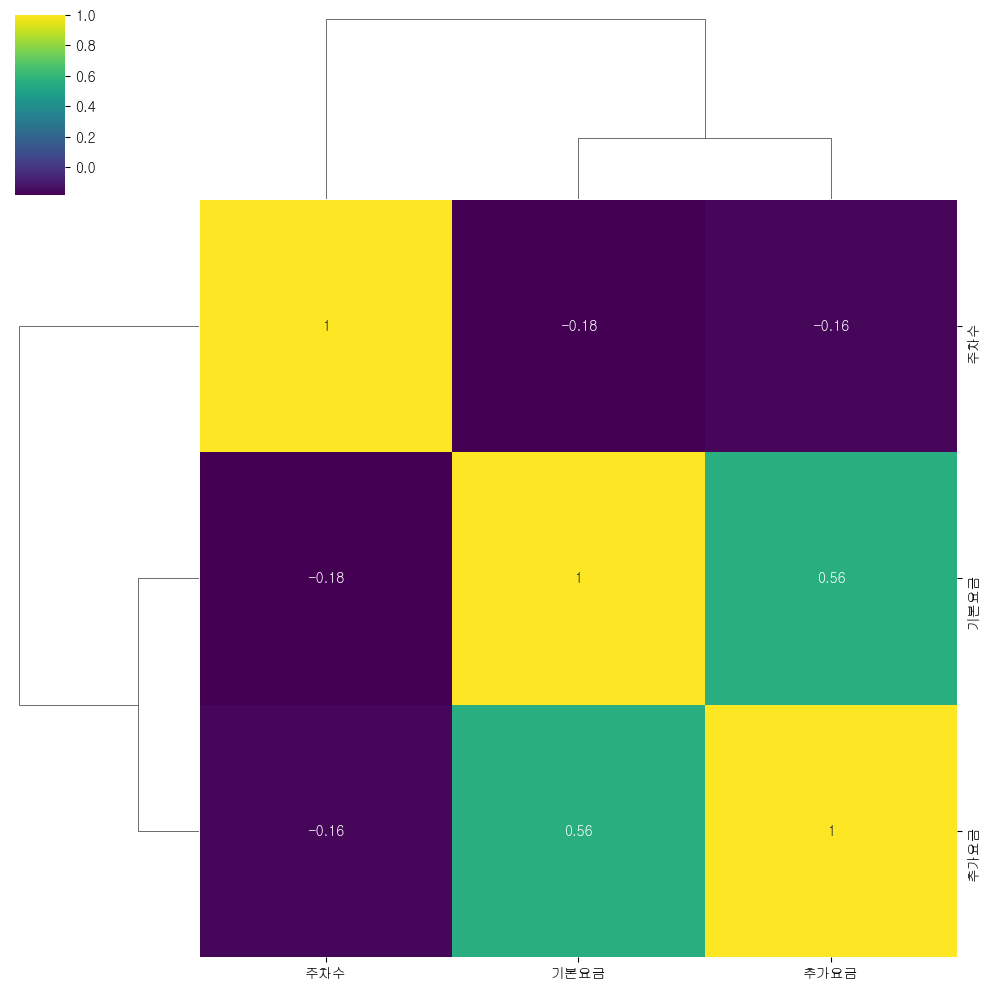

In [67]:
sns.clustermap(my_df.corr(),annot=True, cmap='viridis')

C:\Users\user\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

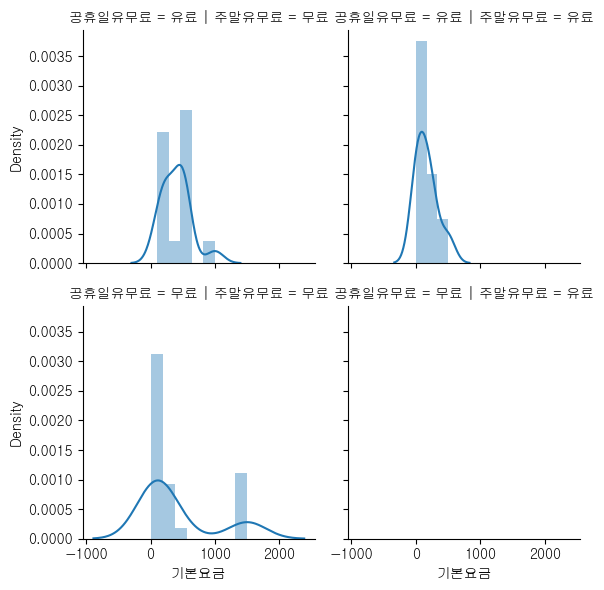

In [70]:
sns.FacetGrid(my_df, col='주말유무료', row='공휴일유무료').map(sns.distplot,'기본요금')

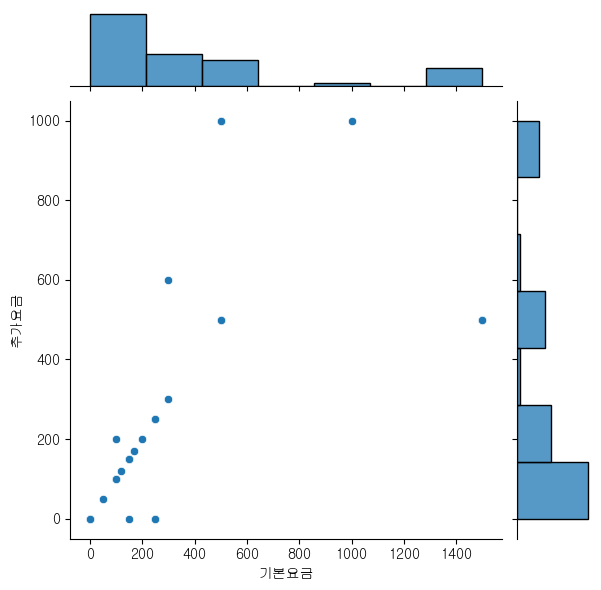

In [71]:
sns.jointplot(x=my_df['기본요금'],y=my_df['추가요금'],kind='scatter')

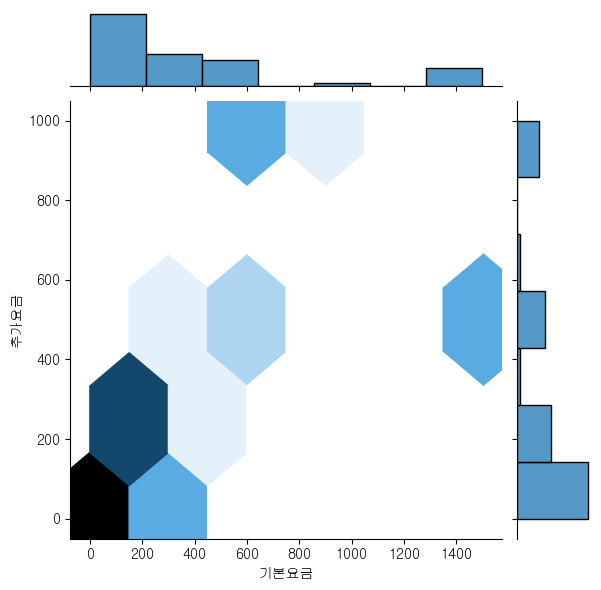

In [72]:
sns.jointplot(x=my_df['기본요금'],y=my_df['추가요금'],kind='hex')

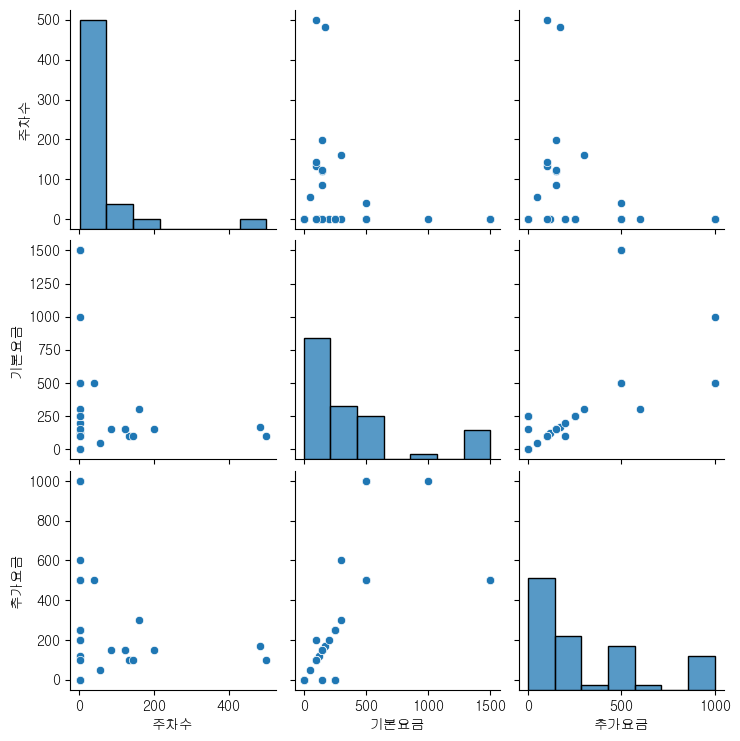

In [73]:
sns.pairplot(my_df)

<AxesSubplot:xlabel='기본요금', ylabel='추가요금'>

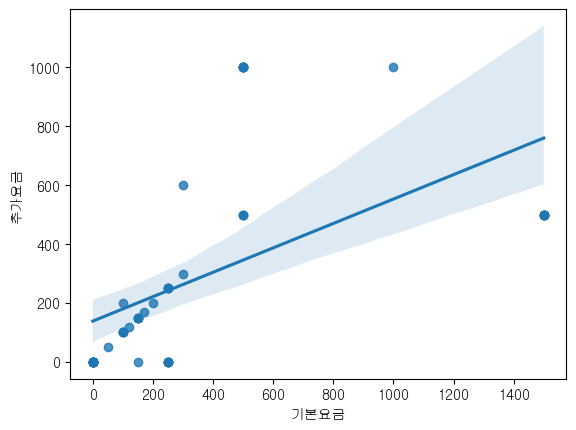

In [75]:
sns.regplot(x='기본요금',y='추가요금',data=my_df)

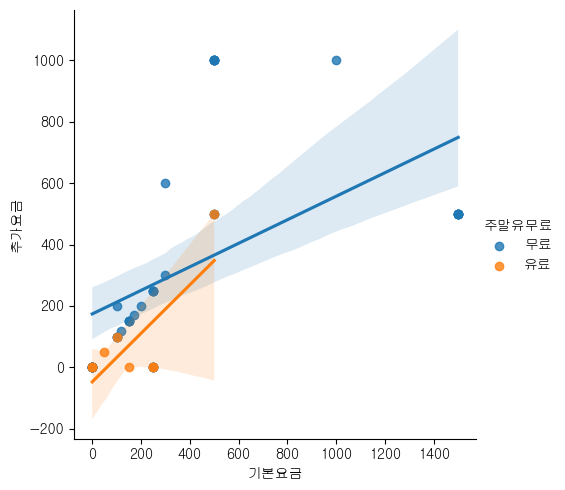

In [78]:
sns.lmplot(x='기본요금',y='추가요금',data=my_df,hue='주말유무료')

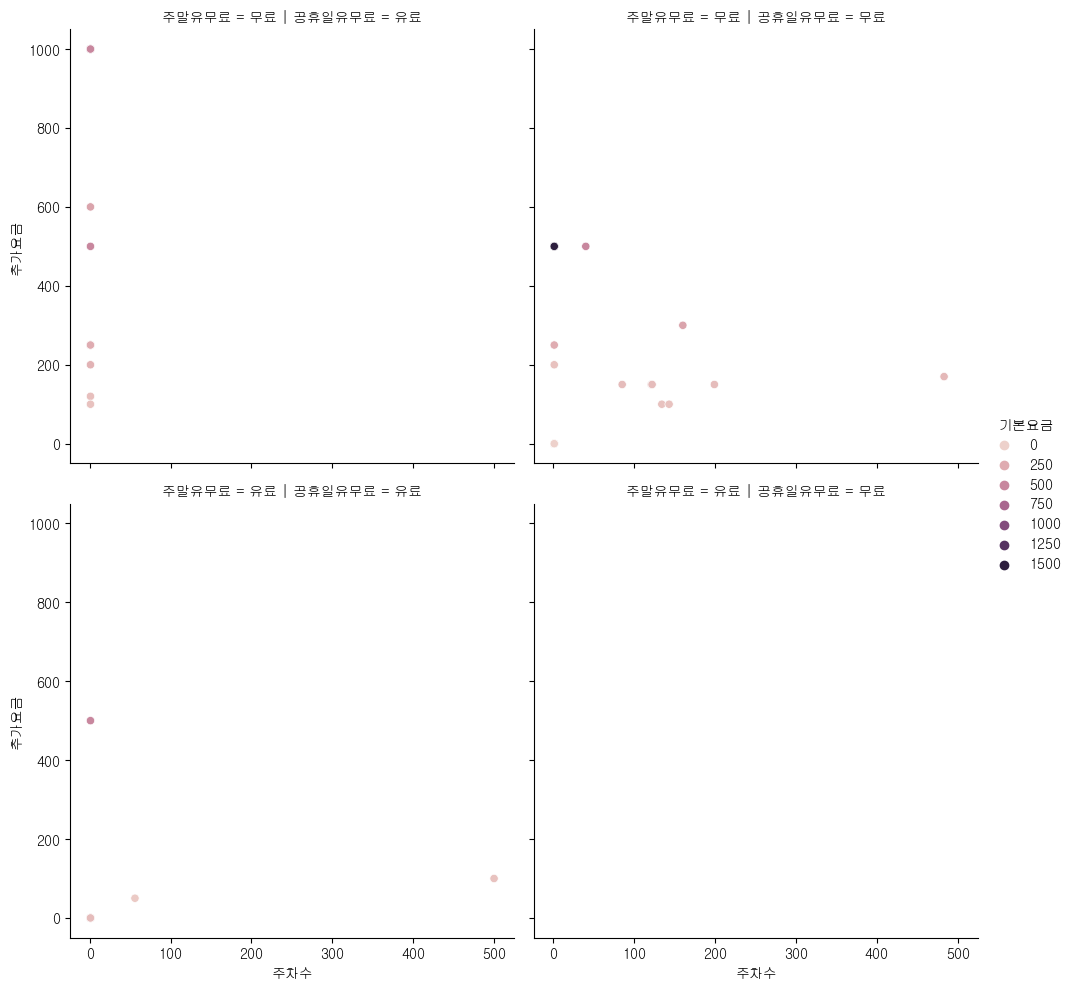

In [80]:
sns.relplot(x='주차수',y='추가요금',hue='기본요금',row='주말유무료',col='공휴일유무료',data=my_df)

# conda install plotly

In [83]:
import plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)

In [84]:
help(plotly.offline.iplot)

Help on function iplot in module plotly.offline.offline:

iplot(figure_or_data, show_link=False, link_text='Export to plot.ly', validate=True, image=None, filename='plot_image', image_width=800, image_height=600, config=None, auto_play=True, animation_opts=None)
    Draw plotly graphs inside an IPython or Jupyter notebook
    
    figure_or_data -- a plotly.graph_objs.Figure or plotly.graph_objs.Data or
                      dict or list that describes a Plotly graph.
                      See https://plot.ly/python/ for examples of
                      graph descriptions.
    
    Keyword arguments:
    show_link (default=False) -- display a link in the bottom-right corner of
                                of the chart that will export the chart to
                                Plotly Cloud or Plotly Enterprise
    link_text (default='Export to plot.ly') -- the text of export link
    validate (default=True) -- validate that all of the keys in the figure
                          

In [85]:
plotly.offline.iplot({
    "data" : [go.Scatter(x=[1,2,3,4],y=[4,3,2,1])],
    "layout":go.Layout(title='hello world')
})

In [86]:
conn= mu.connect_mysql('icia')
df = pd.DataFrame(mu.mysql_execute_dict('select * from lol_datas',conn))
conn.close()

In [88]:
df.keys()

Index(['gameId', 'gameDuration', 'gameVersion', 'summonerName',
       'summonerLevel', 'participantId', 'championName', 'champExperience',
       'teamPosition', 'teamId', 'win', 'kills', 'deaths', 'assists',
       'totalDamageDealtToChampions', 'totalDamageTaken', 'g_5', 'g_6', 'g_7',
       'g_8', 'g_9', 'g_10', 'g_11', 'g_12', 'g_13', 'g_14', 'g_15', 'g_16',
       'g_17', 'g_18', 'g_19', 'g_20', 'g_21', 'g_22', 'g_23', 'g_24', 'g_25'],
      dtype='object')

In [90]:
tmp=df[['championName','totalDamageDealtToChampions','totalDamageTaken']]

In [93]:
result = tmp.groupby('championName').mean().round().reset_index()

In [94]:
import plotly.express as px

In [96]:
fig = px.scatter(result,
                x='totalDamageDealtToChampions',
                y='totalDamageTaken',
                color ='championName'
                )
plotly.offline.iplot(fig)

# 미니프로젝트